# Numerical Recipes Workshop 2
For the week of 30 September to 4 October, 2019

These activities will start with some basics of NumPy array and matrix manipulation, then introduce some methods for computing eigenvalues/eigenvectors.

**This notebook does not need to be handed in.**

## Array Manipulation

NumPy offers very powerful tools for easily and quickly selecting from, operating on, and manipulating arrays.

In [5]:
import numpy as np

### Negative Indexing

Consider an array, `x`, of integers ranging from 1 to N-1. You have already seen that doing `x[i]` will return the i'th value of the array. NumPy arrays can also be indexed with negative numbers. Try this below and see what you get.

In [6]:
x = np.arange(100)

In [7]:
print(x[-5])

95


### Slicing

Multiple contiguous or order array items can be accessed through the following convention:

```
x[start:stop]
x[start:stop:step]
x[start:] # all the way to the end
x[:stop] # start at the beginning.
```

Try selecting every 3rd element of `x` from the 6th element up to 5th to last. Experiment with other combinations.

In [10]:
print(x[5::3])

[ 5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50 53 56 59 62 65 68 71 74
 77 80 83 86 89 92 95 98]


### Boolean Indexing

One of the most powerful features of NumPy arrays is the ability to quickly locate all values in array satisfying a given condition.

The statement below will return a Boolean (True or False) array showing all the locations in the array where the condition is and is not met.

```
x = np.arange(10)
print(x > 5)
```
Try this.

In [14]:
x = np.arange(10)
print(x)
print(x>5)
print(x[x > 5])

[0 1 2 3 4 5 6 7 8 9]
[False False False False False False  True  True  True  True]
[6 7 8 9]


This array can be then be used access all of the values where the condition is True. For example,

```
print(x[x > 5])
```

The Boolean array can be used with any array of the same shape.

```
y = 10 * np.arange(10)
print (y[x > 5])
```

If the `x > 5` array is to be used more than once, it is best practice to save it to a variable so it does not have to be recomputed each time.

```
b = x > 5
print (x[b])
print (y[b])
```

Try this here to see what it looks like.

In [17]:
y = 10 * np.arange(10)
print(y[x > 5])

b = x > 5
print (x[b])
print (y[b])

[60 70 80 90]
[6 7 8 9]
[60 70 80 90]


### And and Or

The `&` (and) and `|` (or) symbols can be used to combine multiple expressions.

```
# greater than 2 and less than 8
print(x[(x > 2) & (x < 8)])
# less than or equal to 2 or greater than or equal to 8
print(x[(x <= 2) | (x >= 8)])
```

Try it!

In [23]:
print(x[(x > 2) & (x < 8)])
print(x[(x <= 2) | (x >= 8)])



[3 4 5 6 7]
[0 1 2 8 9]


Take the array below of 100 random values in the range [0, 1) and calculating the number of values between 0.2 and 0.8 in just one line of code. Hint: when doing arithmetic on Boolean arrays, True and False are equivalent to 1 and 0.

In [32]:
randx = np.random.random(100)

In [33]:
print(len(randx[(randx > 0.2) & (randx < 0.8)]))

53


## Multidimensional Arrays

NumPy supports arrays of arbitrary dimension. Some of the array generation functions introduced previously allow for an array shape to be given instead of a just a size. For example,

```
x = np.ones((3, 5))
print(x)
```

Note the extra parentheses. The argument being given to `np.ones` is `(3, 5)`, not two arguments that are 3 and 5.

An array's shape and size can be found in the following way.

```
print(x.shape)
print(x.size)
```

Note the difference between the two.

Try it!

In [38]:
x = np.ones((3, 5))
print(x)
print(x.shape)
print(x.size)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
(3, 5)
15


### Accessing and Slicing Multidimensional Arrays

Consider the following 2D array:

```
x = np.arange(15)
x = np.reshape(x, (3, 5))
```

The value in the i'th row and j'th column:

```
x[i,j]
```

The entire i'th row:

```
x[i]
```

The entire j'th column:

```
x[:, j]
```

The `[start:stop:step]` slicing can also be used.
```
print (x[1:3, 2:4])
```

Try it!

In [39]:
x = np.arange(15)
x = np.reshape(x, (3, 5))

In [58]:
print(x)
print(x[:,2])
print(x[0:3, 0:3])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[ 2  7 12]
[[ 0  1  2]
 [ 5  6  7]
 [10 11 12]]


### Array Multiplication vs. Matrix Multiplication

Arithmetic operations can be performed on N-dimensional NumPy arrays as long as the first N-1 dimensions are the same shape.

```
x = 2 * np.ones((3, 3))
y = np.reshape(np.arange(9), (3, 3))
print(x * y)
```

However, the above operation is **NOT** matrix multiplication. In the above, if `z = x * y`, then `z[i,j]` will be `x[i, j] * y[i,j]`.

Matrix multiplication can be done with the `np.dot` function.
```
print(np.dot(x, y))
```

Try it out.

In [63]:
x = 2 * np.ones((3, 3))
y = np.reshape(np.arange(9), (3, 3))
print(x)
print(y)
print(x*y) #multiplies each element
print(np.dot(x, y)) #matrix multiplcation

[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0.  2.  4.]
 [ 6.  8. 10.]
 [12. 14. 16.]]
[[18. 24. 30.]
 [18. 24. 30.]
 [18. 24. 30.]]


## Computing Eigenvalues

The [numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) library contains a number of useful matrix operations. Most relevantly, the [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig) function can be used for computing the eigenvalues and eigenvectors of a square matrix.

### Fun with symmetric matrices

Symmetric matrices (where `x[i,j]` = `x[j,i]`) have an interesting property where a histogram of all eigenvalues looks like a semi-circle. Let's demonstrate this.

#### Creating a symmetric array

A symmetric array can be easily created by creating an array of random values and adding it to its transpose.

```
N = 5
x = np.random.random((N, N))
xsym = x + x.T
```

We'll do some additional normalization to limit the range of the eigenvalues.

```
xsym -= xsym.mean()
xsym /= np.sqrt(N)
```

Let's verify that it is symmetric.

```
(xsym == xsym.T).all()
```

Do these steps below. Feel free to do them in separate cells.

In [142]:
N = 
x = np.random.random((N, N))
xsym = x + x.T

In [143]:
xsym -= xsym.mean()
xsym /= np.sqrt(N)

In [144]:
(xsym == xsym.T).all()

True

#### Compute the eigenvalues

Now use the `eig` function to get the eigenvalues and eigenvectors.

```
from numpy import linalg as LA
evals, evecs = LA.eig(xsym)
```

Now, confirm that this satisfies the properties of eigenvalues/vectors.

$
\begin{align}
\large
A \mathbf{X} = \lambda \mathbf{X}
\end{align}
$

```
print (np.dot(xsym, evecs) - evals * evecs))
```

Note, the values are not exactly zero, but pretty close!

In [145]:
from numpy import linalg as LA
evals, evecs = LA.eig(xsym)

In [146]:
print ((np.dot(xsym, evecs) - evals * evecs)) #satisfies above equation but dont quite go to zero

[[-3.03576608e-16 -4.59701721e-17 -1.20563282e-16 ... -1.09165606e-17
  -1.08081404e-17 -1.11050255e-17]
 [ 3.46944695e-18  2.23779328e-16 -9.54097912e-18 ...  4.18595212e-17
   3.20076810e-17  1.14925430e-17]
 [ 1.38777878e-17  3.46944695e-18  1.70002901e-16 ... -2.14672030e-17
   2.65358482e-17  2.61919528e-17]
 ...
 [-6.59194921e-17  1.02348685e-16  1.04083409e-16 ... -3.88957529e-18
  -1.27258230e-17  3.21059368e-17]
 [-1.14491749e-16 -1.30104261e-16 -3.12250226e-17 ...  3.49197803e-17
   1.50153531e-17 -2.18670026e-17]
 [ 1.38777878e-17  2.67147415e-16 -1.17961196e-16 ... -1.13570178e-17
   8.93450353e-18  1.89057754e-17]]


#### Plot the eigenvalues

Plot a histogram of the eigenvalues.

```
hist, bins = np.histogram(evals, bins=min(10, N//50), density=True)

plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
```

In [147]:
from matplotlib import pyplot as plt
%matplotlib inline

In [148]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

<Container object of 40 artists>

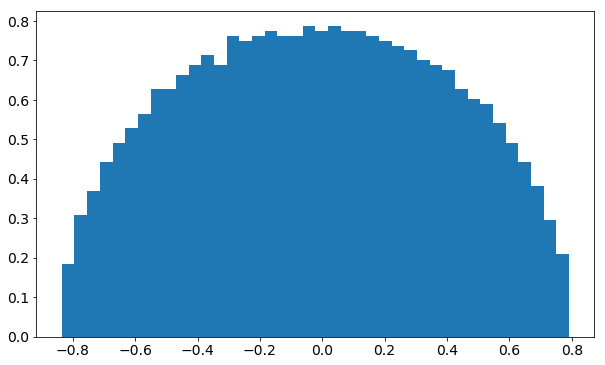

In [150]:
hist, bins = np.histogram(evals, bins=N//50, density=True)

plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))

If that looks unsatisfying, try a larger matrix.

## Sparse Matrices

Notice how the computation time increases when calculating eigenvalues for larger matrices. The memory usage is also rising. However, sparse matrices are mostly filled with zeros. Hence, they can be stored in various compressed format to decrease the amount of memory and computation required. Scipy's [sparse matrices module](https://docs.scipy.org/doc/scipy/reference/sparse.html) provides functionality for creating and operating on sparse matrices. In particular, the [sparse linear algebra](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg) module provides optimized routines for computations with sparse matrices.

Below, we will calculate the eigenvalues of 1-D Laplacian matrix.

In [158]:
from scipy.sparse import diags
from scipy.sparse.linalg import eigs

In [159]:
N = 1000

In [176]:
diagonals = [np.full((N),  -2),
             np.full((N-1), 1),
             np.full((N-1), 1)]

hh = diags(diagonals, [0, -1, 1])

Try printing out `hh` to get a sense of how scipy stores this as a sparse matrix. Try `hh.toarray()` to see it in a more familiar way.

In [185]:
print(hh)

  (0, 0)	-2.0
  (1, 1)	-2.0
  (2, 2)	-2.0
  (3, 3)	-2.0
  (4, 4)	-2.0
  (5, 5)	-2.0
  (6, 6)	-2.0
  (7, 7)	-2.0
  (8, 8)	-2.0
  (9, 9)	-2.0
  (10, 10)	-2.0
  (11, 11)	-2.0
  (12, 12)	-2.0
  (13, 13)	-2.0
  (14, 14)	-2.0
  (15, 15)	-2.0
  (16, 16)	-2.0
  (17, 17)	-2.0
  (18, 18)	-2.0
  (19, 19)	-2.0
  (20, 20)	-2.0
  (21, 21)	-2.0
  (22, 22)	-2.0
  (23, 23)	-2.0
  (24, 24)	-2.0
  :	:
  (974, 975)	1.0
  (975, 976)	1.0
  (976, 977)	1.0
  (977, 978)	1.0
  (978, 979)	1.0
  (979, 980)	1.0
  (980, 981)	1.0
  (981, 982)	1.0
  (982, 983)	1.0
  (983, 984)	1.0
  (984, 985)	1.0
  (985, 986)	1.0
  (986, 987)	1.0
  (987, 988)	1.0
  (988, 989)	1.0
  (989, 990)	1.0
  (990, 991)	1.0
  (991, 992)	1.0
  (992, 993)	1.0
  (993, 994)	1.0
  (994, 995)	1.0
  (995, 996)	1.0
  (996, 997)	1.0
  (997, 998)	1.0
  (998, 999)	1.0


Now, calculate the eigenvalues.

In [169]:
vv, ww = eigs(hh, k=min(10, N-2), which="LM")
E = np.sort(np.real(vv))
print(E[0])

print("exact lowest value = ", 2*(np.cos(np.pi*N/(N+1))-1))

-3.99999015011325
('exact lowest value = ', -3.999990150113323)


Use the timing framework below to experiment with different values of `N` (matrix size) or `k` (number of eigenvalues calculated). How does the algorithm scale with `N` and `k`?

In [12]:
import time

In [13]:
# time something!
t1 = time.time()
# do something!
t2 = time.time()
print (t2-t1)

5.29289245605e-05
